Dataset Summary:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Class Distribution:
target
1    165
0    138
Name: count, dtype: int64

Before Resampling:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91


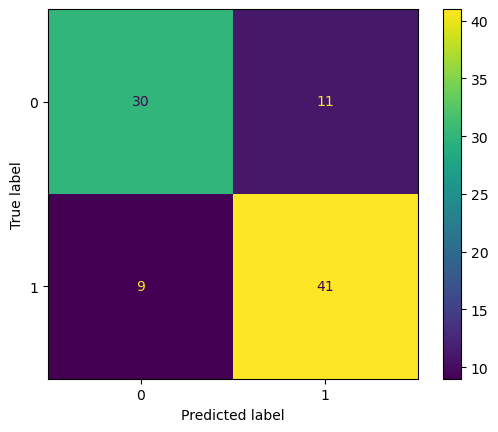

In [3]:
#1)How can you use Python to handle imbalanced datasets for classification tasks?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
data = pd.read_csv('heart.csv')

# Display dataset summary
print("Dataset Summary:")
print(data.head())

# Check class distribution
print("\nClass Distribution:")
print(data['target'].value_counts())

# Step 2: Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Train a baseline model on the imbalanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate on the imbalanced test data
y_pred = clf.predict(X_test)
print("\nBefore Resampling:")
print(classification_report(y_test, y_pred))

# Step 5: Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Train a model on the balanced data
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_resampled, y_resampled)

# Evaluate the resampled model
y_pred_smote = clf_smote.predict(X_test)
print("\nAfter SMOTE Resampling:")
print(classification_report(y_test, y_pred_smote))

# Step 7: Visualize Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf_smote, X_test, y_test)


Dataset Summary:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\skl

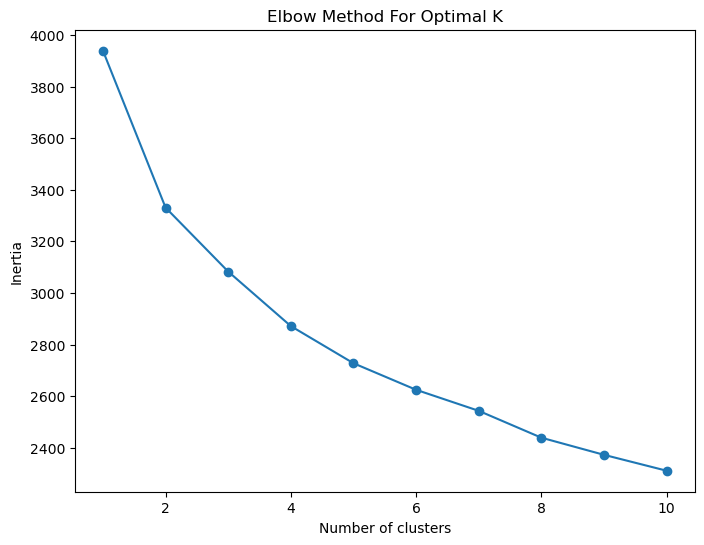

C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Meghana\anaconda3\Lib\site-packages\skl

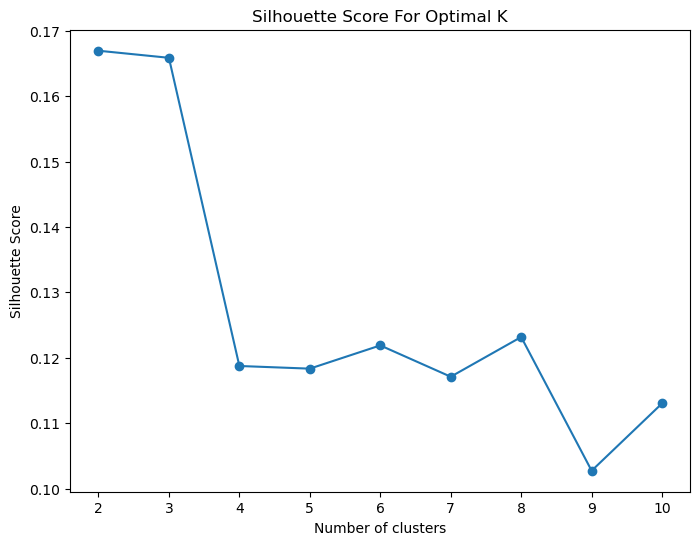

Optimal number of clusters based on silhouette score: 2


In [4]:
#2) How do you choose the optimal number of clusters for K-means in Python?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the heart disease dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print("Dataset Summary:")
print(data.head())

# Step 2: Preprocessing
# Drop the 'target' column as we want to apply unsupervised clustering
X = data.drop('target', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Step 4: Silhouette Score Method
sil_scores = []
for k in range(2, 11):  # Silhouette score is only defined for k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Score For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Step 5: Output the optimal K based on the highest silhouette score
optimal_k = np.argmax(sil_scores) + 2  # Add 2 to account for the range starting from 2
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")


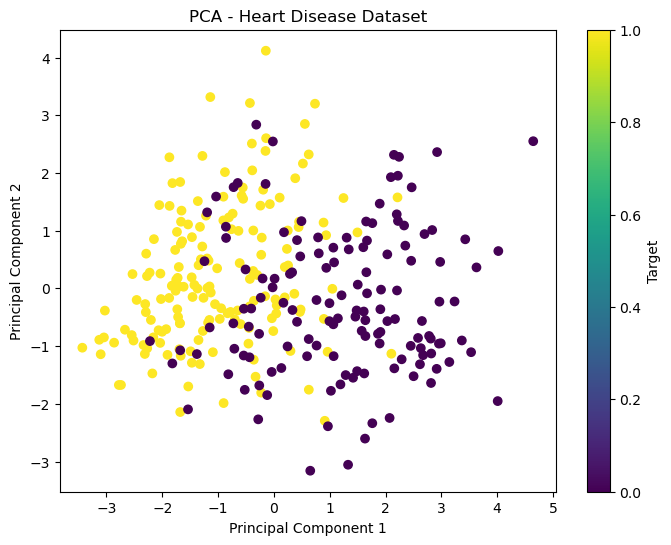

Explained variance ratio: [0.21254053 0.11820708]


In [5]:
#3)What techniques can you use to reduce dimensionality for large datasets (e.g., PCA)?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the heart disease dataset
data = pd.read_csv('heart.csv')

# Step 2: Preprocessing
# Drop the 'target' column (as we are not using it in unsupervised learning)
X = data.drop('target', axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['target'], cmap='viridis')
plt.colorbar(label='Target')
plt.title("PCA - Heart Disease Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance ratio for the principal components
print("Explained variance ratio:", pca.explained_variance_ratio_)


Correlation Matrix:
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

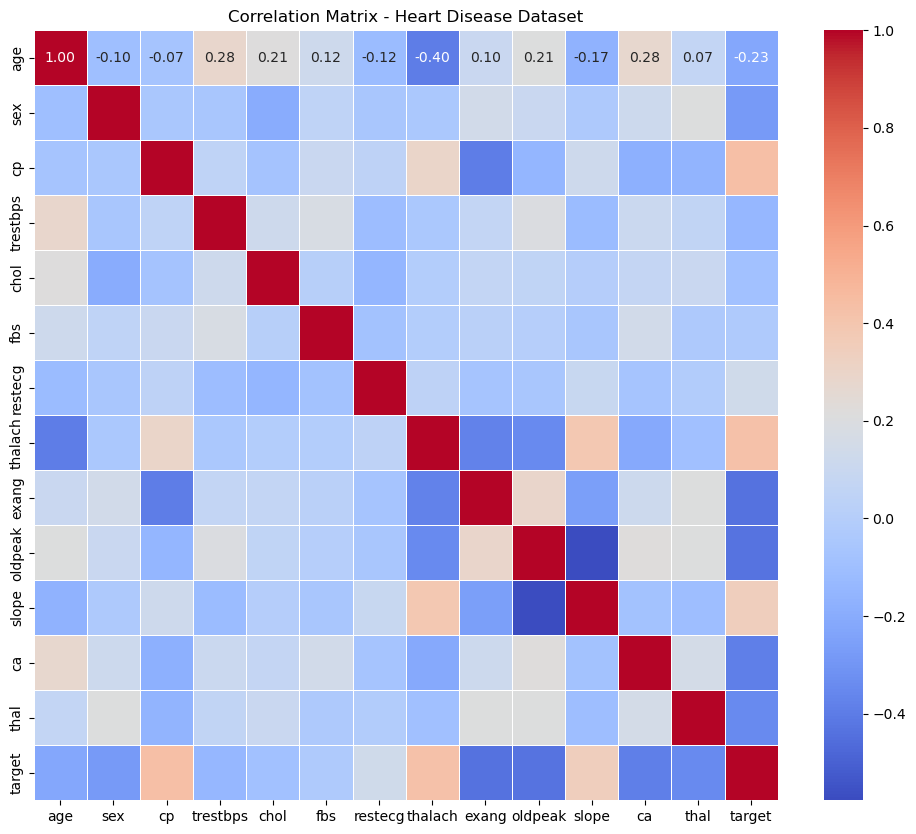


Correlation between 'age' and 'chol': 0.21367795655956184

Correlation with the target variable (Heart Disease):
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


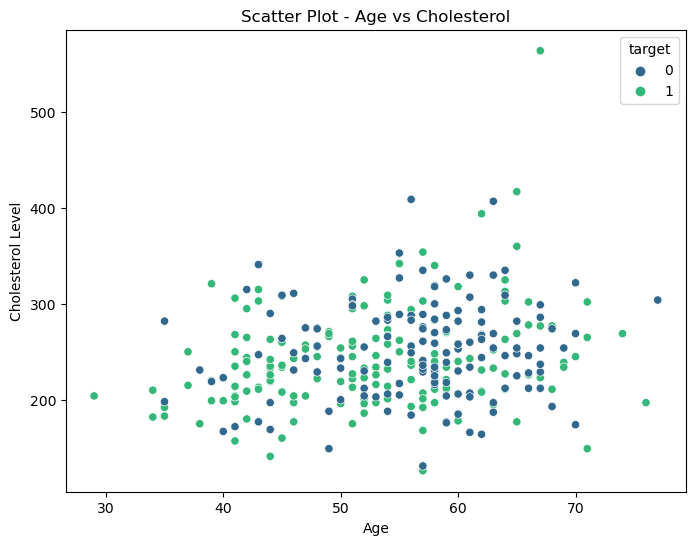

In [6]:
#4)How do you use Python to find and visualize correlations in a big dataset?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Heart Disease dataset
data = pd.read_csv('heart.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlation Matrix - Heart Disease Dataset")
plt.show()

# Example: Correlation between 'age' and 'chol'
print("\nCorrelation between 'age' and 'chol':", data['age'].corr(data['chol']))

# Example: Correlation with the target variable
print("\nCorrelation with the target variable (Heart Disease):")
print(correlation_matrix['target'].sort_values(ascending=False))

# Scatter plot for 'age' vs 'chol'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data, hue='target', palette='viridis')
plt.title("Scatter Plot - Age vs Cholesterol")
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()


In [8]:
!pip install missingno


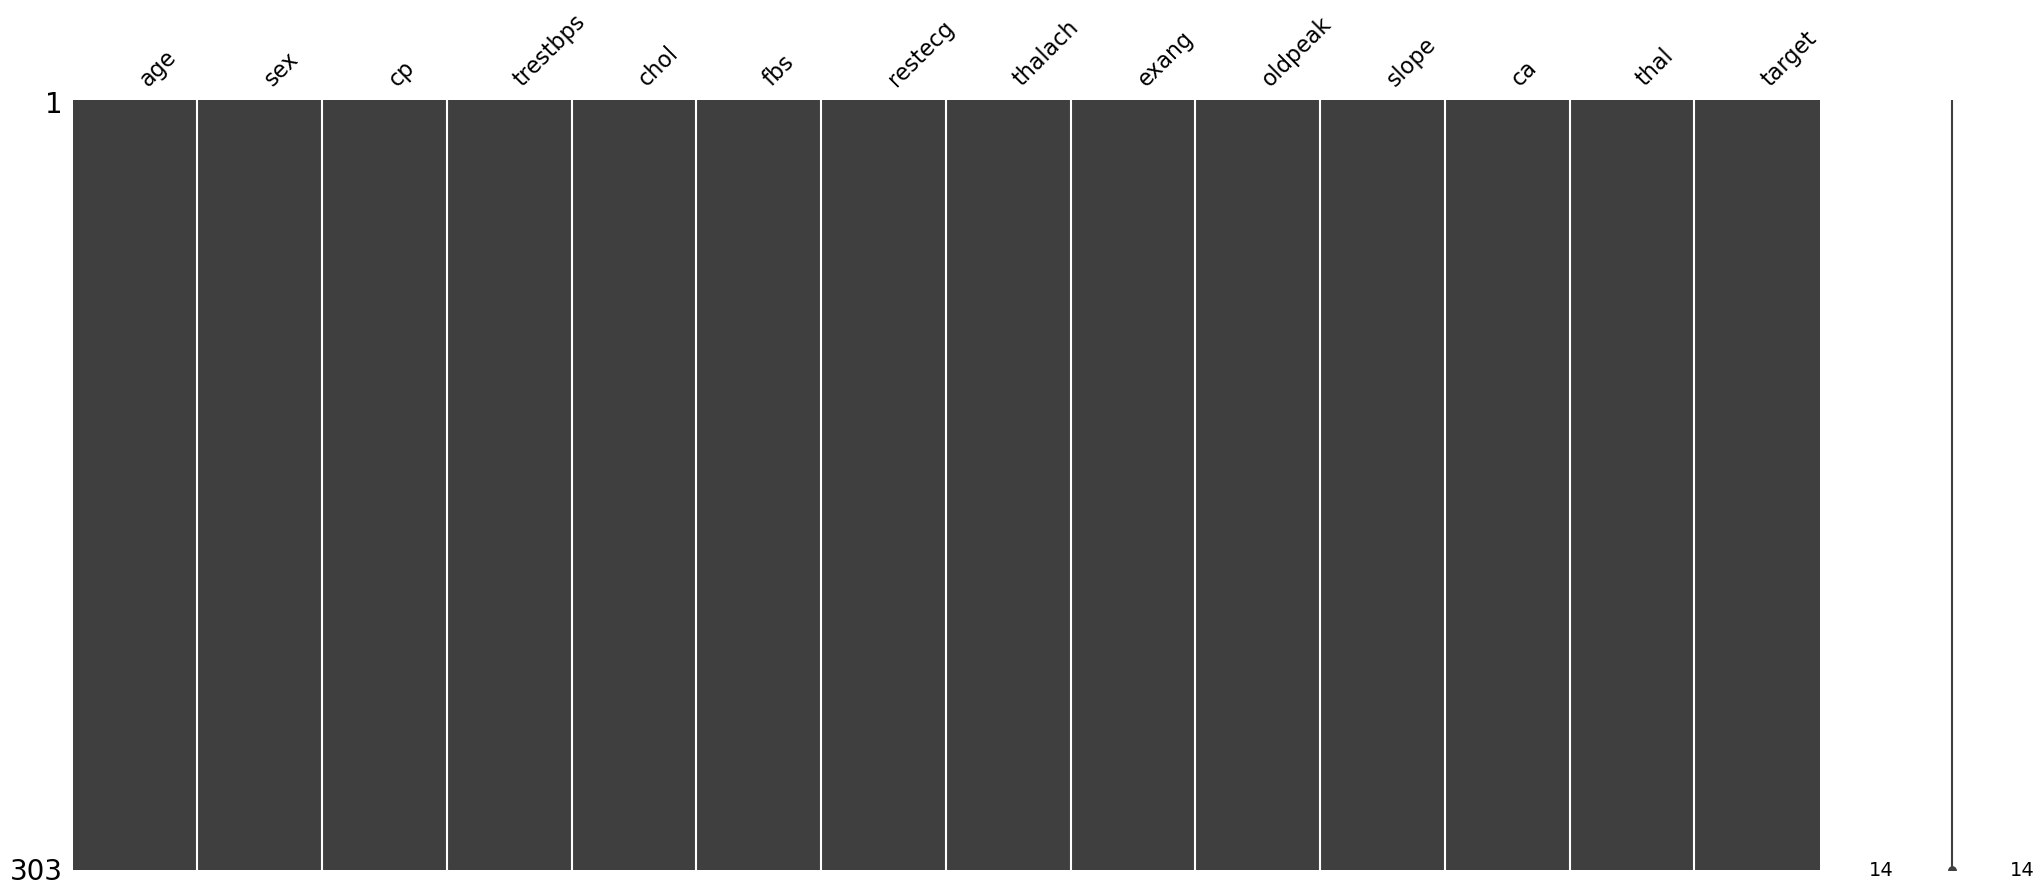

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
#5) How can you handle missing values in a dataset using Python?

import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer

# Load the Heart Disease dataset
data = pd.read_csv('heart.csv')

# Step 1: Visualize missing data
msno.matrix(data)
plt.show()

# Step 2: Fill missing values with the mean for numeric columns
data['age'] = data['age'].fillna(data['age'].mean())
data['chol'] = data['chol'].fillna(data['chol'].mean())

# Fill missing categorical values with mode
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])

# Step 3: KNN imputation for any remaining missing values
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

# Step 4: Check for remaining missing values
print(data_knn_imputed.isnull().sum())


Duplicate Rows (based on all columns):
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
Original data shape: (303, 14)
Cleaned data shape: (302, 14)

Duplicate Rows based on 'age' and 'chol':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   
207   60    0   0       150   258    0        0      157      0      2.6   
224   54    1   0       110   239    0        1      126      1      2.8   
251   43    1   0       132   247    1        0      143      1      0.1   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target  
164      2   4     2       1  
207      1   2     3       0  
224      1   1     3       0  
251      1   4     3       0  
260      1   2     3       0  

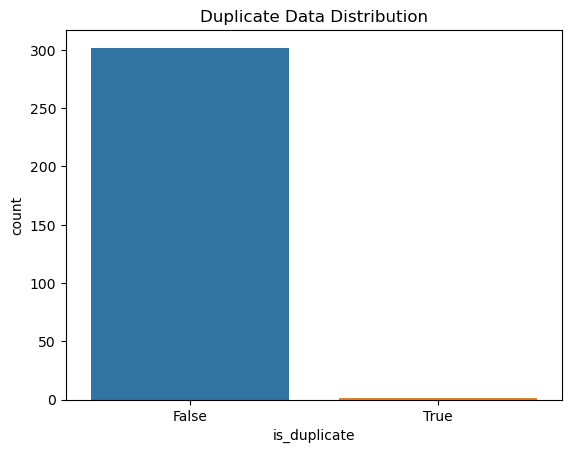

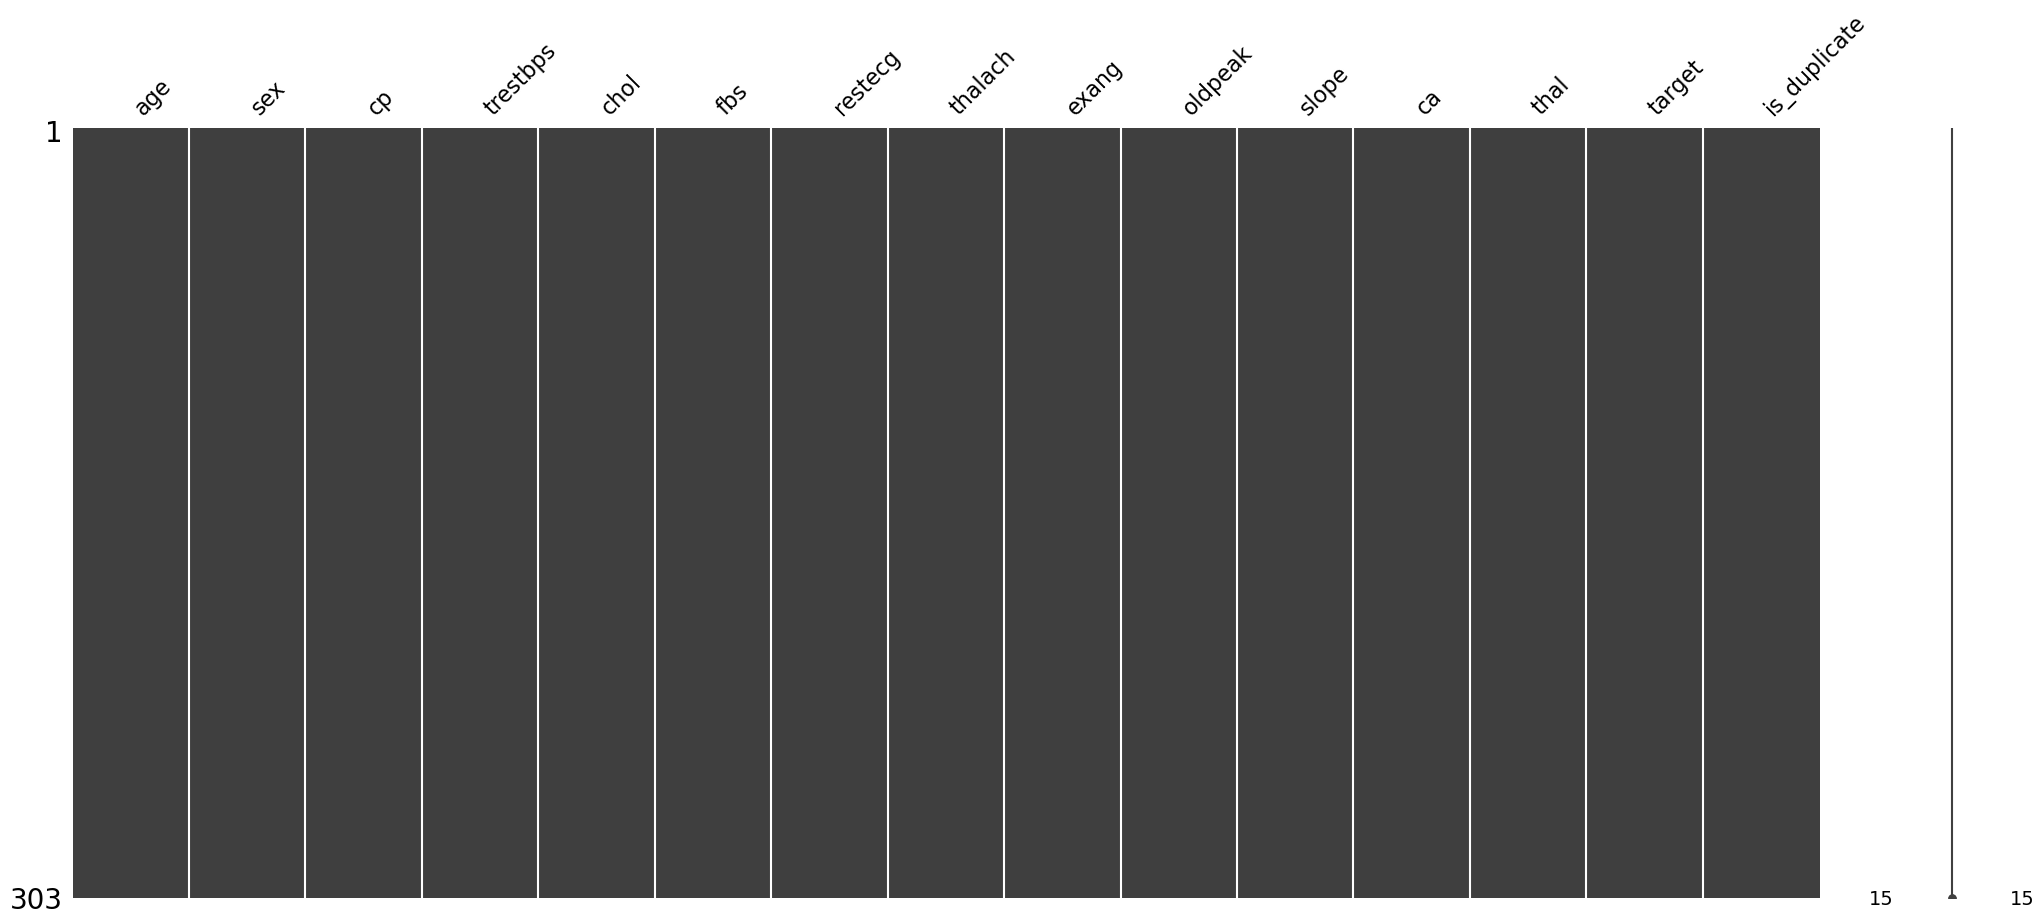

In [10]:
#6) How can you detect and remove duplicate entries in a big dataset?

import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Load the Heart Disease dataset
data = pd.read_csv('heart.csv')

# Step 1: Detect duplicates (based on all columns)
duplicates = data.duplicated()
print("Duplicate Rows (based on all columns):")
print(data[duplicates])

# Step 2: Remove duplicate rows (based on all columns)
data_cleaned = data.drop_duplicates()

# Step 3: Check shape of the data before and after cleaning
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_cleaned.shape)

# Step 4: Detect duplicates based on specific columns (e.g., 'age' and 'chol')
duplicates_specific_columns = data.duplicated(subset=['age', 'chol'])
print("\nDuplicate Rows based on 'age' and 'chol':")
print(data[duplicates_specific_columns])

# Step 5: Remove duplicates based on specific columns
data_cleaned_specific = data.drop_duplicates(subset=['age', 'chol'])
print("Cleaned data shape based on specific columns:", data_cleaned_specific.shape)

# Step 6: Visualize duplicates
data['is_duplicate'] = data.duplicated()

# Plot the distribution of duplicates
sns.countplot(x='is_duplicate', data=data)
plt.title('Duplicate Data Distribution')
plt.show()

# Optional: Visualize missing values
msno.matrix(data)
plt.show()



   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

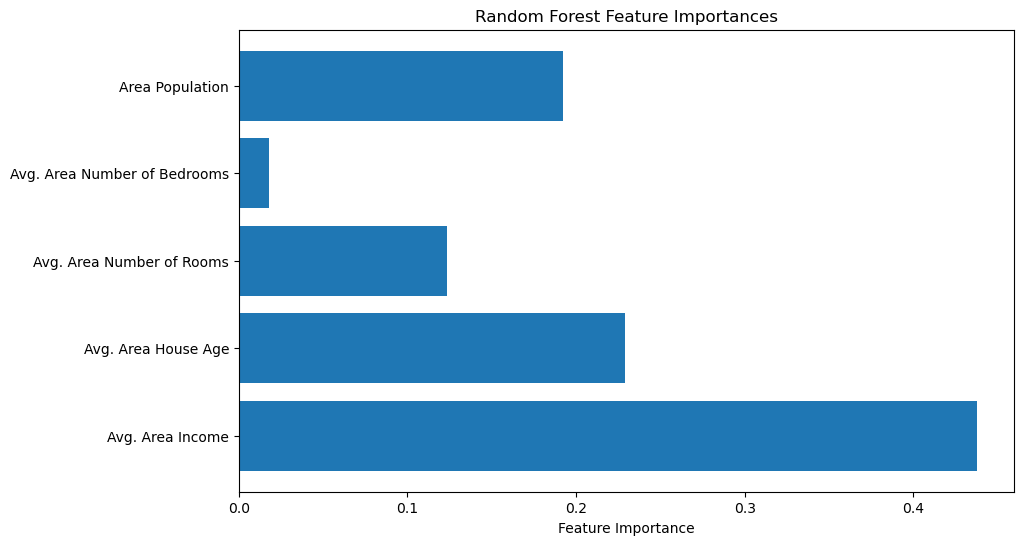

In [16]:
#7) How can you implement and tune a Random Forest Regression model for housing price prediction?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the housing dataset
data = pd.read_csv('housing.csv')

# Check the first few rows of the dataset
print(data.head())

# Drop any columns that are non-numeric or irrelevant (e.g., address, etc.)
# You can modify this based on the columns in your dataset
data = data.select_dtypes(include=['float64', 'int64'])

# Handle missing values if any
# Impute missing values using the median for numerical columns
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Features (X) and target (y)
# Assuming 'price' is the target column
X = data_imputed.drop('Price', axis=1)
y = data_imputed['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

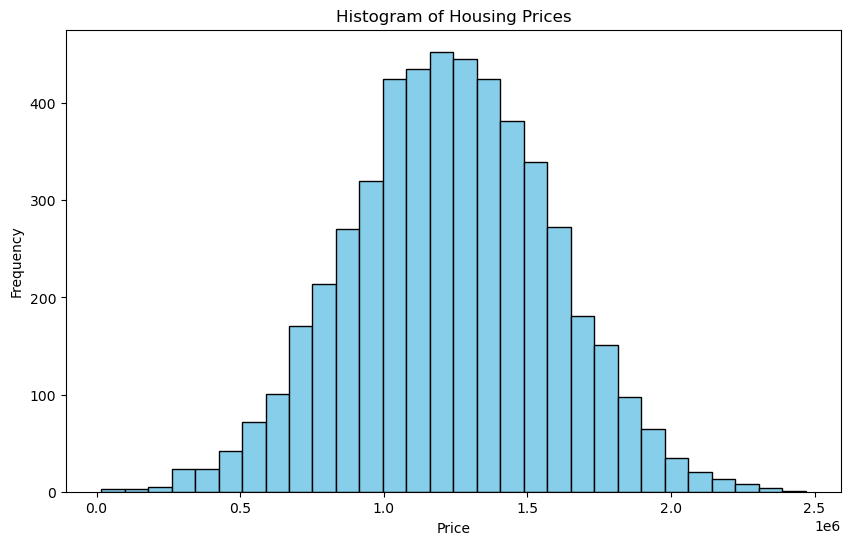

In [ ]:
#8) Plot the histogram, bar chart and pie chart on a sample data set

import pandas as pd
import matplotlib.pyplot as plt

# Load the housing dataset
data = pd.read_csv('housing.csv')

# Check the first few rows to understand the structure of the dataset
print(data.head())

# 1. Plot a histogram for 'price' (assuming 'price' is a numerical column)
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Plot a bar chart for the average price per 'location' (assuming 'location' is a categorical column)
# Group by 'location' and calculate the mean price for each location
avg_price_by_location = data.groupby('Address')['Price'].mean()

plt.figure(figsize=(12, 6))
avg_price_by_location.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Price per Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# 3. Plot a pie chart for the distribution of 'location' (percentage of houses in each location)
location_counts = data['Address'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Houses by Location')
plt.show()


In [20]:
# Check the column names to ensure 'location' and 'price' exist
print(data.columns)


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005 

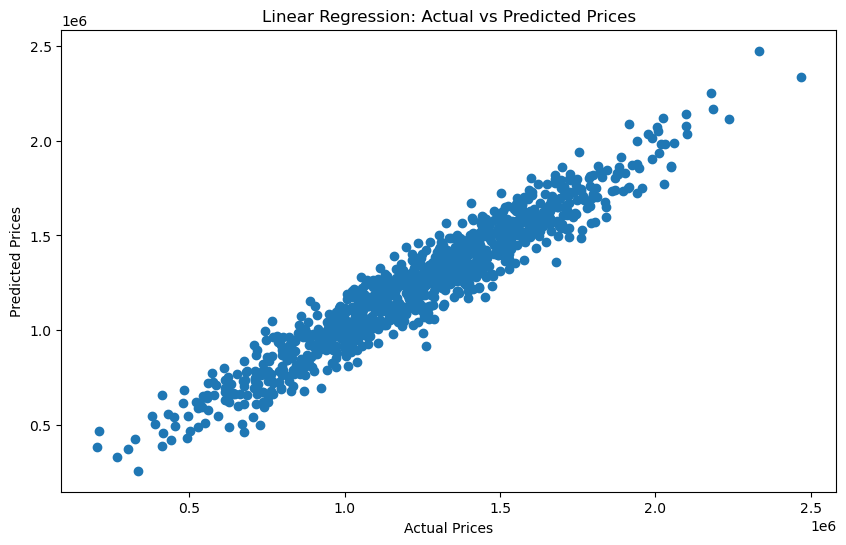

In [1]:
#9)Implement Linear and logistic Regression on a sample dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Load the Housing dataset
# Replace 'housing.csv' with the actual path to your dataset if needed
housing_data = pd.read_csv('housing.csv')

# Display basic information about the dataset
print(housing_data.info())
print(housing_data.head())

#  Linear Regression 

# Assume 'Price' is the target variable for Linear Regression
# Replace 'Price' and the features below with actual column names from your dataset
if 'Price' in housing_data.columns:
    # Selecting numerical features for simplicity
    features = housing_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])
    target = housing_data['Price']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred_linear = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_linear)
    print(f"Linear Regression Mean Squared Error: {mse}")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_linear)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Linear Regression: Actual vs Predicted Prices")
    plt.show()

else:
    print("Column 'Price' not found in the dataset. Please check the column names.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005 

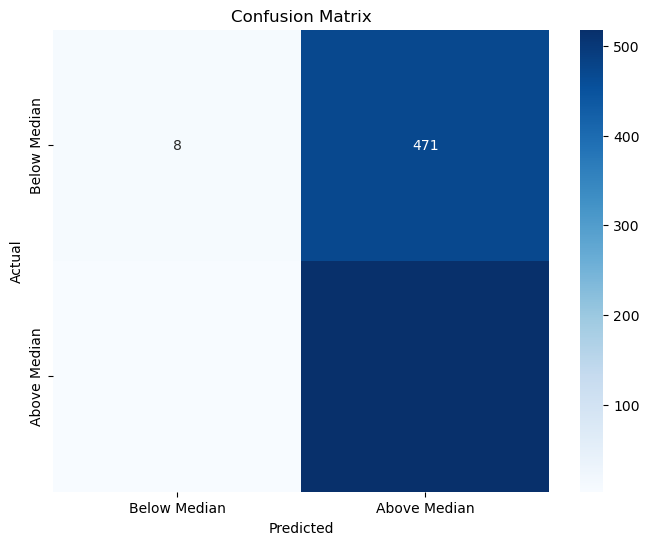

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
housing_data = pd.read_csv('housing.csv')

# Display dataset overview
print(housing_data.info())
print(housing_data.head())

# Define the target variable and features
median_price = housing_data['Price'].median()

# Create a binary target variable: 1 if Price > median, 0 otherwise
housing_data['Price_Category'] = (housing_data['Price'] > median_price).astype(int)

# Select features and drop non-numeric and unnecessary columns
features = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                         'Avg. Area Number of Bedrooms', 'Area Population']]
target = housing_data['Price_Category']

# Handle missing values (if any)
features = features.fillna(features.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:
#10) How do you use Python to create lag features for time-series data sets.

import pandas as pd

# Simulating the Housing dataset
housing_data = {
    'Avg. Area Income': [65000, 72000, 67000, 68000, 71000],
    'Avg. Area House Age': [5, 6, 4, 5.5, 6.2],
    'Avg. Area Number of Rooms': [7, 6, 8, 7.5, 7.8],
    'Avg. Area Number of Bedrooms': [3, 3.5, 4, 3, 3.8],
    'Area Population': [35000, 40000, 38000, 36000, 39000],
    'Price': [250000, 300000, 280000, 270000, 290000],
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '101 Maple St', '202 Pine St']
}
df = pd.DataFrame(housing_data)

# Add a synthetic 'Date' column to simulate a time-series structure
df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='D')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Create lag features for the 'Price' column
df['Lag_1'] = df['Price'].shift(1)  # 1-day lag
df['Lag_2'] = df['Price'].shift(2)  # 2-day lag
df['Lag_3'] = df['Price'].shift(3)  # 3-day lag

# Display the DataFrame with lag features
print(df)

# Handle missing values in lag features (if needed)
# You can drop NaN rows or fill with a specific value
df.fillna(0, inplace=True)  # Example: Filling NaN with 0
print("\nAfter filling missing values:")
print(df)


            Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
Date                                                                           
2022-01-01             65000                  5.0                        7.0   
2022-01-02             72000                  6.0                        6.0   
2022-01-03             67000                  4.0                        8.0   
2022-01-04             68000                  5.5                        7.5   
2022-01-05             71000                  6.2                        7.8   

            Avg. Area Number of Bedrooms  Area Population   Price  \
Date                                                                
2022-01-01                           3.0            35000  250000   
2022-01-02                           3.5            40000  300000   
2022-01-03                           4.0            38000  280000   
2022-01-04                           3.0            36000  270000   
2022-01-05               